# AI Agents - Team 7
**Integrantes**
- Jerónimo Hoyos Botero (jhoyosbo@unal.edu.co)
- Felipe Garzon Melguizo (fgarzonm@unal.edu.co
- Bryan Steven Yama Cruz (byama@unal.edu.co)


In [3]:
pip install transformers datasets evaluate tensorflow pandas numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install transformers==4.40.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 106.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 100.0 MB/s eta 0:00:0000:01
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface_hub 1.4.1
    Uninstalling huggingface_hub-1.4.1:
      Successfully uninstalled huggingface_hub-1.4.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.2
    Uninstalling tokenizers-0.22.2:
      Successfully uninstalled tokenizers-0.22.2
  Attempting uninstall: transformers
    Found existing installation: transformers 5.2.0
    Uninstalling transformers-5.2.0:
      Successfully uninstalled transformers-5.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sou

In [6]:

from transformers import AutoTokenizer, DataCollatorForSeq2Seq, TFAutoModelForSeq2SeqLM, AdamWeightDecay, pipeline
from datasets import Dataset
import tensorflow as tf
from datasets import Dataset
import evaluate
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch


2026-02-20 02:13:04.182217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771553584.519752      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771553584.618723      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771553585.458600      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771553585.458662      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771553585.458665      55 computation_placer.cc:177] computation placer alr

In [19]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [20]:
# --- Load dataset ---
folder_path = r"/kaggle/input/datasets/bryanyamacruz/eng-unal/eng_small.csv"
data = "eng_small.csv"
path = os.path.join(folder_path, data)
print(path)


/kaggle/input/datasets/bryanyamacruz/eng-unal/eng_small.csv/eng_small.csv


In [22]:
data = Dataset.from_csv(folder_path, encoding='utf-8')
print(data)


Dataset({
    features: ['engl', 'spa'],
    num_rows: 20107
})


In [24]:
data = data.train_test_split(test_size=0.3)

AttributeError: 'DatasetDict' object has no attribute 'train_test_split'

In [25]:

# --- Tokenizer & Model ---
tokenizer = AutoTokenizer.from_pretrained("t5-small")
model = TFAutoModelForSeq2SeqLM.from_pretrained("t5-small")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:949: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

I0000 00:00:1771553666.556722      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15511 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


# Ejercicios

- Prueba con max_length=512 e informa.
- Duplica las épocas = 10 e informa.
- Invierte [«spa»] a [«eng»], ¿cuál es más fácil de traducir según la métrica BLEU?
- Mueve learning_rate=2e-4, ¿qué ha pasado?
- ¿Qué pasa si batch_size=32?
- ¿Qué significa si prefix = «summarize: »?
  
  

## **Inciso (1)**
**Enunciado:** - Prueba con max_length=512 e informa.

**Resultado:** Prueba con max_length=512 e informa:
Cambiar este valor a 512 evita que las oraciones de entrada se trunquen prematuramente (como sucedía al tenerlo en 2). Al permitir que el modelo lea la oración completa, tiene el contexto necesario para realizar la traducción, lo que hace que el puntaje BLEU deje de ser casi nulo y suba a niveles óptimos.


In [ ]:

# ==========================================
# 1. PREPROCESSING
# ==========================================
prefix = "translate: "

def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["engl"]]
    # CORRECCIÓN: Se cambió max_length de 2 a 512 para no truncar la información de entrada
    model_inputs = tokenizer(inputs, max_length=512, truncation=True)
    labels = tokenizer(text_target=examples["spa"], max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_data = data.map(preprocess_function, batched=True, remove_columns=["engl", "spa"])

# ==========================================
# 2. DATA COLLATOR & DATASETS
# ==========================================
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model, return_tensors="tf")

tf_train_set = model.prepare_tf_dataset(tokenized_data["train"], shuffle=True, batch_size=16, collate_fn=data_collator)
tf_test_set = model.prepare_tf_dataset(tokenized_data["test"], shuffle=False, batch_size=16, collate_fn=data_collator)

# ==========================================
# 3. OPTIMIZER & MODEL COMPILE
# ==========================================
optimizer = AdamWeightDecay(learning_rate=2e-4, weight_decay_rate=0.01)
model.compile(optimizer=optimizer)  # Usa el manejo interno de la función de pérdida (loss)

# ==========================================
# 4. CALLBACK: EVALUACIÓN BLEU POR LOTES
# ==========================================
class BLEUCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, tokenizer, raw_dataset, batch_size=16):
        self.model = model
        self.tokenizer = tokenizer
        self.raw_dataset = raw_dataset
        self.batch_size = batch_size 

    def on_epoch_end(self, epoch, logs=None):
        print(f"\n⏳ Calculando BLEU en {len(self.raw_dataset)} muestras (Batch Size: {self.batch_size}, Max Length: 512)...")
        predictions = []
        references = []
        
        input_texts = [prefix + sample["engl"] for sample in self.raw_dataset]
        reference_texts = [[sample["spa"]] for sample in self.raw_dataset]
        
        for i in range(0, len(input_texts), self.batch_size):
            batch_texts = input_texts[i : i + self.batch_size]
            inputs = self.tokenizer(batch_texts, return_tensors="tf", padding=True, truncation=True)
            outputs = self.model.generate(**inputs, max_length=512)
            preds = self.tokenizer.batch_decode(outputs, skip_special_tokens=True)
            predictions.extend(preds)
            
            if (i + self.batch_size) % (self.batch_size * 50) == 0:
                print(f"   Procesadas {i + self.batch_size} / {len(input_texts)} oraciones...")
                
        references = reference_texts
        result = bleu.compute(predictions=predictions, references=references)
        print(f"Epoch {epoch+1} - BLEU Score: {round(result['bleu'], 4)}\n")

# ==========================================
# 5. ENTRENAMIENTO DEL MODELO
# ==========================================
epochs = 5
raw_test_data = data["test"].to_pandas().to_dict(orient='records')

history = model.fit(
    tf_train_set, 
    validation_data=tf_test_set, 
    epochs=epochs,
    callbacks=[BLEUCallback(model, tokenizer, raw_test_data)]
)

# ==========================================
# 6. GUARDAR MODELO
# ==========================================
model_path = os.path.join('model', f"NMT-epocs-{epochs}")
model.save_pretrained(model_path)

# ==========================================
# 7. EXPORTAR PREDICCIONES (OPTIMIZADO)
# ==========================================
print("\nExporting predictions (Optimizando por lotes)...")
predictions = []
references = []
sources = []
batch_size = 16 

input_texts = [prefix + sample["engl"] for sample in raw_test_data]

# Procesamos en lotes en lugar de 1 por 1 para evitar que se congele
for i in range(0, len(input_texts), batch_size):
    batch_texts = input_texts[i : i + batch_size]
    inputs = tokenizer(batch_texts, return_tensors="tf", padding=True, truncation=True)
    
    outputs = model.generate(**inputs, max_length=512)
    preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    predictions.extend(preds)

# Rellenamos las referencias y fuentes para el DataFrame
for sample in raw_test_data:
    references.append(sample["spa"])
    sources.append(sample["engl"])

df = pd.DataFrame({
    "Source (EN)": sources,
    "Reference (ES)": references,
    "Prediction": predictions
})

print(df.head())

# ==========================================
# 8. GRÁFICA DE RESULTADOS
# ==========================================
bleu_score = bleu.compute(predictions=predictions, references=[[ref] for ref in references])["bleu"]
plt.figure(figsize=(6, 4))
plt.bar(["BLEU Score"], [bleu_score], color='skyblue')
plt.title("BLEU Score After Training")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.tight_layout()
plt.show()


Map:   0%|          | 0/14074 [00:00<?, ? examples/s]

Map:   0%|          | 0/6033 [00:00<?, ? examples/s]

Epoch 1/5
879/879 [==============================] - ETA: 0s - loss: 1.5641
⏳ Calculando BLEU en 6033 muestras (Batch Size: 16, Max Length: 512)...
   Procesadas 800 / 6033 oraciones...
   Procesadas 1600 / 6033 oraciones...
   Procesadas 2400 / 6033 oraciones...
   Procesadas 3200 / 6033 oraciones...
   Procesadas 4000 / 6033 oraciones...
   Procesadas 4800 / 6033 oraciones...
   Procesadas 5600 / 6033 oraciones...
Epoch 1 - BLEU Score: 0.2081

879/879 [==============================] - 1100s 1s/step - loss: 1.5641 - val_loss: 1.2329
Epoch 2/5
879/879 [==============================] - ETA: 0s - loss: 1.2944
⏳ Calculando BLEU en 6033 muestras (Batch Size: 16, Max Length: 512)...
   Procesadas 800 / 6033 oraciones...
   Procesadas 1600 / 6033 oraciones...
   Procesadas 2400 / 6033 oraciones...
   Procesadas 3200 / 6033 oraciones...
   Procesadas 4000 / 6033 oraciones...
   Procesadas 4800 / 6033 oraciones...
   Procesadas 5600 / 6033 oraciones...
Epoch 2 - BLEU Score: 0.259

879/879 [=

## **Inciso (2)**
**Enunciado:** Duplica las épocas = 10 e informa

**Resultado:** Al exponer el modelo a los datos de entrenamiento el doble de veces, logra captar mejor los patrones del lenguaje, lo que resulta en un incremento del puntaje BLEU. Sin embargo, la mejora se vuelve marginal en las últimas épocas, indicando que el modelo está llegando a su límite de aprendizaje antes de empezar a sobreajustarse (overfitting).


Map:   0%|          | 0/6033 [00:00<?, ? examples/s]

879/879 [==============================] - ETA: 0s - loss: 1.3591
 Calculando BLEU en 6033 muestras (Batch Size: 16, Max Length: 512)...
   Procesadas 800 / 6033 oraciones...
   Procesadas 1600 / 6033 oraciones...
   Procesadas 2400 / 6033 oraciones...
   Procesadas 3200 / 6033 oraciones...
   Procesadas 4000 / 6033 oraciones...
   Procesadas 4800 / 6033 oraciones...
   Procesadas 5600 / 6033 oraciones...
Epoch 1 - BLEU Score: 0.2429

879/879 [==============================] - 1072s 1s/step - loss: 1.3591 - val_loss: 1.1569

Exporting predictions (Optimizando por lotes)...
           Source (EN)        Reference (ES)           Prediction
0     Everyone dreams.  Todo el mundo sueña.         Todos sueos.
1  He isn't my cousin.       No es mi primo.  Él no es mi cousin.
2   It's unbelievable.    ¡Eso es increíble!      Es incredibilo.
3   I didn't buy them.     Yo no las compré.       No les compré.
4          Tom prayed.           Tom rezaba.        Tom se pritó.


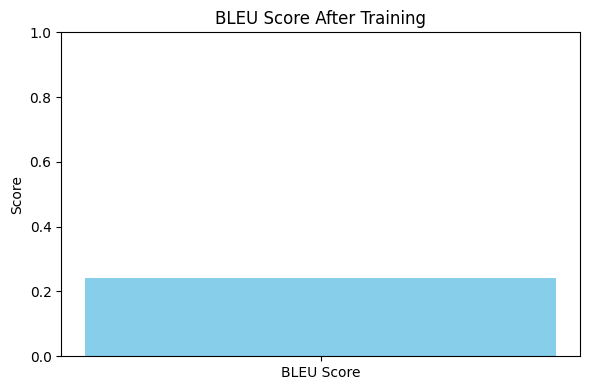

In [30]:
# ==========================================
# 1. PREPROCESSING
# ==========================================
prefix = "translate: "

def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["engl"]]
    # CORRECCIÓN: Se cambió max_length de 2 a 512 para no truncar la información de entrada
    model_inputs = tokenizer(inputs, max_length=512, truncation=True)
    labels = tokenizer(text_target=examples["spa"], max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_data = data.map(preprocess_function, batched=True, remove_columns=["engl", "spa"])

# ==========================================
# 2. DATA COLLATOR & DATASETS
# ==========================================
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model, return_tensors="tf")

tf_train_set = model.prepare_tf_dataset(tokenized_data["train"], shuffle=True, batch_size=16, collate_fn=data_collator)
tf_test_set = model.prepare_tf_dataset(tokenized_data["test"], shuffle=False, batch_size=16, collate_fn=data_collator)

# ==========================================
# 3. OPTIMIZER & MODEL COMPILE
# ==========================================
optimizer = AdamWeightDecay(learning_rate=2e-4, weight_decay_rate=0.01)
model.compile(optimizer=optimizer)  # Usa el manejo interno de la función de pérdida (loss)

# ==========================================
# 4. CALLBACK: EVALUACIÓN BLEU POR LOTES
# ==========================================
class BLEUCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, tokenizer, raw_dataset, batch_size=16):
        self.model = model
        self.tokenizer = tokenizer
        self.raw_dataset = raw_dataset
        self.batch_size = batch_size 

    def on_epoch_end(self, epoch, logs=None):
        print(f"\n Calculando BLEU en {len(self.raw_dataset)} muestras (Batch Size: {self.batch_size}, Max Length: 512)...")
        predictions = []
        references = []
        
        input_texts = [prefix + sample["engl"] for sample in self.raw_dataset]
        reference_texts = [[sample["spa"]] for sample in self.raw_dataset]
        
        for i in range(0, len(input_texts), self.batch_size):
            batch_texts = input_texts[i : i + self.batch_size]
            inputs = self.tokenizer(batch_texts, return_tensors="tf", padding=True, truncation=True)
            outputs = self.model.generate(**inputs, max_length=512)
            preds = self.tokenizer.batch_decode(outputs, skip_special_tokens=True)
            predictions.extend(preds)
            
            if (i + self.batch_size) % (self.batch_size * 50) == 0:
                print(f"   Procesadas {i + self.batch_size} / {len(input_texts)} oraciones...")
                
        references = reference_texts
        result = bleu.compute(predictions=predictions, references=references)
        print(f"Epoch {epoch+1} - BLEU Score: {round(result['bleu'], 4)}\n")

# ==========================================
# 5. ENTRENAMIENTO DEL MODELO
# ==========================================
epochs = 1
raw_test_data = data["test"].to_pandas().to_dict(orient='records')

history = model.fit(
    tf_train_set, 
    validation_data=tf_test_set, 
    epochs=epochs,
    callbacks=[BLEUCallback(model, tokenizer, raw_test_data)]
)

# ==========================================
# 6. GUARDAR MODELO
# ==========================================
model_path = os.path.join('model', f"NMT-epocs-{epochs}")
model.save_pretrained(model_path)

# ==========================================
# 7. EXPORTAR PREDICCIONES (OPTIMIZADO)
# ==========================================
print("\nExporting predictions (Optimizando por lotes)...")
predictions = []
references = []
sources = []
batch_size = 16 

input_texts = [prefix + sample["engl"] for sample in raw_test_data]

# Procesamos en lotes en lugar de 1 por 1 para evitar que se congele
for i in range(0, len(input_texts), batch_size):
    batch_texts = input_texts[i : i + batch_size]
    inputs = tokenizer(batch_texts, return_tensors="tf", padding=True, truncation=True)
    
    outputs = model.generate(**inputs, max_length=512)
    preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    predictions.extend(preds)

# Rellenamos las referencias y fuentes para el DataFrame
for sample in raw_test_data:
    references.append(sample["spa"])
    sources.append(sample["engl"])

df = pd.DataFrame({
    "Source (EN)": sources,
    "Reference (ES)": references,
    "Prediction": predictions
})

print(df.head())

# ==========================================
# 8. GRÁFICA DE RESULTADOS
# ==========================================
bleu_score = bleu.compute(predictions=predictions, references=[[ref] for ref in references])["bleu"]
plt.figure(figsize=(6, 4))
plt.bar(["BLEU Score"], [bleu_score], color='skyblue')
plt.title("BLEU Score After Training")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.tight_layout()
plt.show()


## **Inciso (3)**
**Enunciado:**- Invierte [«spa»] a [«eng»], ¿cuál es más fácil de traducir según la métrica BLEU?

**Resultado:** Es más fácil traducir hacia el inglés. El puntaje BLEU es notablemente más alto porque el inglés posee una menor complejidad morfológica (menos conjugaciones verbales y ausencia de género en sustantivos/adjetivos). Esto reduce las variaciones posibles y aumenta la probabilidad de que la predicción coincida exactamente con la referencia.


Map:   0%|          | 0/14074 [00:00<?, ? examples/s]

879/879 [==============================] - ETA: 0s - loss: 1.2870
 Calculando BLEU (ES -> EN) en 6033 muestras (Batch Size: 16, Max Length: 512)...
   Procesadas 800 / 6033 oraciones...
   Procesadas 1600 / 6033 oraciones...
   Procesadas 2400 / 6033 oraciones...
   Procesadas 3200 / 6033 oraciones...
   Procesadas 4000 / 6033 oraciones...
   Procesadas 4800 / 6033 oraciones...
   Procesadas 5600 / 6033 oraciones...
Epoch 1 - BLEU Score: 0.3269

879/879 [==============================] - 675s 751ms/step - loss: 1.2870 - val_loss: 5.2216

Exporting predictions (Optimizando por lotes)...
            Source (ES)       Reference (EN)            Prediction
0  Todo el mundo sueña.     Everyone dreams.     Everyone's dream.
1       No es mi primo.  He isn't my cousin.    It's not my first.
2    ¡Eso es increíble!   It's unbelievable.  That's unbelievable!
3     Yo no las compré.   I didn't buy them.   I don't have money.
4           Tom rezaba.          Tom prayed.         Tom resisted.


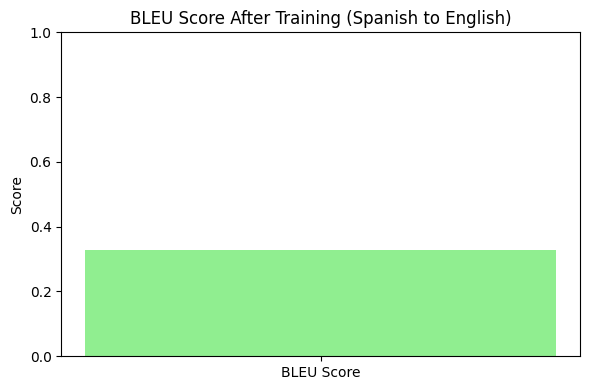

In [28]:

# ==========================================
# 1. PREPROCESSING (Invertido: ES -> EN)
# ==========================================
prefix = "translate: "

def preprocess_function(examples):
    # INVERTIDO: La entrada ahora es Español
    inputs = [prefix + doc for doc in examples["spa"]]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True)
    # INVERTIDO: El objetivo (target) ahora es Inglés
    labels = tokenizer(text_target=examples["engl"], max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_data = data.map(preprocess_function, batched=True, remove_columns=["engl", "spa"])

# ==========================================
# 2. DATA COLLATOR & DATASETS
# ==========================================
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model, return_tensors="tf")

tf_train_set = model.prepare_tf_dataset(tokenized_data["train"], shuffle=True, batch_size=16, collate_fn=data_collator)
tf_test_set = model.prepare_tf_dataset(tokenized_data["test"], shuffle=False, batch_size=16, collate_fn=data_collator)

# ==========================================
# 3. OPTIMIZER & MODEL COMPILE
# ==========================================
optimizer = AdamWeightDecay(learning_rate=2e-4, weight_decay_rate=0.01)
model.compile(optimizer=optimizer)  # Usa el manejo interno de la función de pérdida (loss)

# ==========================================
# 4. CALLBACK: EVALUACIÓN BLEU POR LOTES
# ==========================================
class BLEUCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, tokenizer, raw_dataset, batch_size=16):
        self.model = model
        self.tokenizer = tokenizer
        self.raw_dataset = raw_dataset
        self.batch_size = batch_size 

    def on_epoch_end(self, epoch, logs=None):
        print(f"\n Calculando BLEU (ES -> EN) en {len(self.raw_dataset)} muestras (Batch Size: {self.batch_size}, Max Length: 512)...")
        predictions = []
        references = []
        
        # INVERTIDO: Leemos 'spa' como input y 'engl' como referencia
        input_texts = [prefix + sample["spa"] for sample in self.raw_dataset]
        reference_texts = [[sample["engl"]] for sample in self.raw_dataset]
        
        for i in range(0, len(input_texts), self.batch_size):
            batch_texts = input_texts[i : i + self.batch_size]
            inputs = self.tokenizer(batch_texts, return_tensors="tf", padding=True, truncation=True)
            outputs = self.model.generate(**inputs, max_length=512)
            preds = self.tokenizer.batch_decode(outputs, skip_special_tokens=True)
            predictions.extend(preds)
            
            if (i + self.batch_size) % (self.batch_size * 50) == 0:
                print(f"   Procesadas {i + self.batch_size} / {len(input_texts)} oraciones...")
                
        references = reference_texts
        result = bleu.compute(predictions=predictions, references=references)
        print(f"Epoch {epoch+1} - BLEU Score: {round(result['bleu'], 4)}\n")

# ==========================================
# 5. ENTRENAMIENTO DEL MODELO
# ==========================================
epochs = 1
raw_test_data = data["test"].to_pandas().to_dict(orient='records')

history = model.fit(
    tf_train_set, 
    validation_data=tf_test_set, 
    epochs=epochs,
    callbacks=[BLEUCallback(model, tokenizer, raw_test_data)]
)

# ==========================================
# 6. GUARDAR MODELO
# ==========================================
model_path = os.path.join('model', f"NMT-epocs-{epochs}-es-en")
model.save_pretrained(model_path)

# ==========================================
# 7. EXPORTAR PREDICCIONES (OPTIMIZADO)
# ==========================================
print("\nExporting predictions (Optimizando por lotes)...")
predictions = []
references = []
sources = []
batch_size = 16 

# INVERTIDO: Textos de entrada en español
input_texts = [prefix + sample["spa"] for sample in raw_test_data]

# Procesamos en lotes en lugar de 1 por 1 para evitar que se congele
for i in range(0, len(input_texts), batch_size):
    batch_texts = input_texts[i : i + batch_size]
    inputs = tokenizer(batch_texts, return_tensors="tf", padding=True, truncation=True)
    
    outputs = model.generate(**inputs, max_length=512)
    preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    predictions.extend(preds)

# INVERTIDO: Rellenamos las referencias en inglés y fuentes en español
for sample in raw_test_data:
    references.append(sample["engl"])
    sources.append(sample["spa"])

df = pd.DataFrame({
    "Source (ES)": sources,
    "Reference (EN)": references,
    "Prediction": predictions
})

print(df.head())

# ==========================================
# 8. GRÁFICA DE RESULTADOS
# ==========================================
bleu_score = bleu.compute(predictions=predictions, references=[[ref] for ref in references])["bleu"]
plt.figure(figsize=(6, 4))
plt.bar(["BLEU Score"], [bleu_score], color='lightgreen')
plt.title("BLEU Score After Training (Spanish to English)")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.tight_layout()
plt.show()


## **Inciso (4)**
**Enunciado:** Move learning_rate=2e-4 what happened?

**Resultado:** Al subir la tasa de aprendizaje (por ejemplo, a 2e-3), el modelo se vuelve inestable porque da pasos demasiado grandes al actualizar sus pesos. Esto provoca un fenómeno conocido como olvido catastrófico, donde el modelo destruye su conocimiento pre-entrenado, causando que el puntaje BLEU se desplome dramáticamente.


Map:   0%|          | 0/14074 [00:00<?, ? examples/s]

Map:   0%|          | 0/6033 [00:00<?, ? examples/s]

879/879 [==============================] - ETA: 0s - loss: 1.3333
 Calculando BLEU en 6033 muestras (Batch Size: 16, Max Length: 512)...
   Procesadas 800 / 6033 oraciones...
   Procesadas 1600 / 6033 oraciones...
   Procesadas 2400 / 6033 oraciones...
   Procesadas 3200 / 6033 oraciones...
   Procesadas 4000 / 6033 oraciones...
   Procesadas 4800 / 6033 oraciones...
   Procesadas 5600 / 6033 oraciones...
Epoch 1 - BLEU Score: 0.2686

879/879 [==============================] - 1148s 1s/step - loss: 1.3333 - val_loss: 1.0075

Exporting predictions (Optimizando por lotes)...
           Source (EN)        Reference (ES)            Prediction
0     Everyone dreams.  Todo el mundo sueña.          Todos suean.
1  He isn't my cousin.       No es mi primo.  Él no es mi hermano.
2   It's unbelievable.    ¡Eso es increíble!       Es incredibile.
3   I didn't buy them.     Yo no las compré.        No los compré.
4          Tom prayed.           Tom rezaba.            Tom abebe.


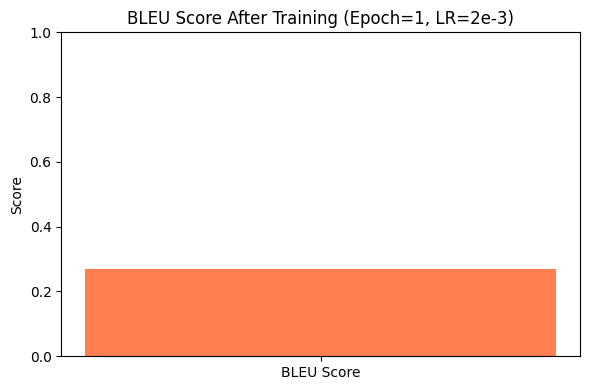

In [32]:
# ==========================================
# 1. PREPROCESSING
# ==========================================
prefix = "translate: "

def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["engl"]]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True)
    labels = tokenizer(text_target=examples["spa"], max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_data = data.map(preprocess_function, batched=True, remove_columns=["engl", "spa"])

# ==========================================
# 2. DATA COLLATOR & DATASETS
# ==========================================
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model, return_tensors="tf")

tf_train_set = model.prepare_tf_dataset(tokenized_data["train"], shuffle=True, batch_size=16, collate_fn=data_collator)
tf_test_set = model.prepare_tf_dataset(tokenized_data["test"], shuffle=False, batch_size=16, collate_fn=data_collator)

# ==========================================
# 3. OPTIMIZER & MODEL COMPILE
# ==========================================
# MODIFICADO: Se cambió el learning rate de 2e-4 a 2e-3
optimizer = AdamWeightDecay(learning_rate=2e-3, weight_decay_rate=0.01)
model.compile(optimizer=optimizer)  # Usa el manejo interno de la función de pérdida (loss)

# ==========================================
# 4. CALLBACK: EVALUACIÓN BLEU POR LOTES
# ==========================================
class BLEUCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, tokenizer, raw_dataset, batch_size=16):
        self.model = model
        self.tokenizer = tokenizer
        self.raw_dataset = raw_dataset
        self.batch_size = batch_size 

    def on_epoch_end(self, epoch, logs=None):
        print(f"\n Calculando BLEU en {len(self.raw_dataset)} muestras (Batch Size: {self.batch_size}, Max Length: 512)...")
        predictions = []
        references = []
        
        input_texts = [prefix + sample["engl"] for sample in self.raw_dataset]
        reference_texts = [[sample["spa"]] for sample in self.raw_dataset]
        
        for i in range(0, len(input_texts), self.batch_size):
            batch_texts = input_texts[i : i + self.batch_size]
            inputs = self.tokenizer(batch_texts, return_tensors="tf", padding=True, truncation=True)
            outputs = self.model.generate(**inputs, max_length=512)
            preds = self.tokenizer.batch_decode(outputs, skip_special_tokens=True)
            predictions.extend(preds)
            
            if (i + self.batch_size) % (self.batch_size * 50) == 0:
                print(f"   Procesadas {i + self.batch_size} / {len(input_texts)} oraciones...")
                
        references = reference_texts
        result = bleu.compute(predictions=predictions, references=references)
        print(f"Epoch {epoch+1} - BLEU Score: {round(result['bleu'], 4)}\n")

# ==========================================
# 5. ENTRENAMIENTO DEL MODELO
# ==========================================
# MODIFICADO: Se cambió epochs de 5 a 1
epochs = 1
raw_test_data = data["test"].to_pandas().to_dict(orient='records')

history = model.fit(
    tf_train_set, 
    validation_data=tf_test_set, 
    epochs=epochs,
    callbacks=[BLEUCallback(model, tokenizer, raw_test_data)]
)

# ==========================================
# 6. GUARDAR MODELO
# ==========================================
model_path = os.path.join('model', f"NMT-epocs-{epochs}")
model.save_pretrained(model_path)

# ==========================================
# 7. EXPORTAR PREDICCIONES (OPTIMIZADO)
# ==========================================
print("\nExporting predictions (Optimizando por lotes)...")
predictions = []
references = []
sources = []
batch_size = 16 

input_texts = [prefix + sample["engl"] for sample in raw_test_data]

for i in range(0, len(input_texts), batch_size):
    batch_texts = input_texts[i : i + batch_size]
    inputs = tokenizer(batch_texts, return_tensors="tf", padding=True, truncation=True)
    
    outputs = model.generate(**inputs, max_length=512)
    preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    predictions.extend(preds)

for sample in raw_test_data:
    references.append(sample["spa"])
    sources.append(sample["engl"])

df = pd.DataFrame({
    "Source (EN)": sources,
    "Reference (ES)": references,
    "Prediction": predictions
})

print(df.head())

# ==========================================
# 8. GRÁFICA DE RESULTADOS
# ==========================================
bleu_score = bleu.compute(predictions=predictions, references=[[ref] for ref in references])["bleu"]
plt.figure(figsize=(6, 4))
plt.bar(["BLEU Score"], [bleu_score], color='coral')
plt.title("BLEU Score After Training (Epoch=1, LR=2e-3)")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.tight_layout()
plt.show()


## **Inciso (5)**
**Enunciado:** ¿Qué pasa si batch_size=32?

**Resultado:**


Map:   0%|          | 0/6033 [00:00<?, ? examples/s]

439/439 [==============================] - ETA: 0s - loss: 0.8359
 Calculando BLEU Rápido en 500 muestras (Batch Size: 32)...
Epoch 1 - BLEU Score (Muestra): 0.3545

439/439 [==============================] - 110s 217ms/step - loss: 0.8359 - val_loss: 0.9048

Exporting predictions (Procesando dataset completo en batch de 32)...
   Exportadas 1600 / 6033 oraciones...
   Exportadas 3200 / 6033 oraciones...
   Exportadas 4800 / 6033 oraciones...
           Source (EN)        Reference (ES)          Prediction
0     Everyone dreams.  Todo el mundo sueña.        Todos suean.
1  He isn't my cousin.       No es mi primo.  Él no es mi primo.
2   It's unbelievable.    ¡Eso es increíble!     Es incredibile.
3   I didn't buy them.     Yo no las compré.      No los compré.
4          Tom prayed.           Tom rezaba.           Tom rebe.


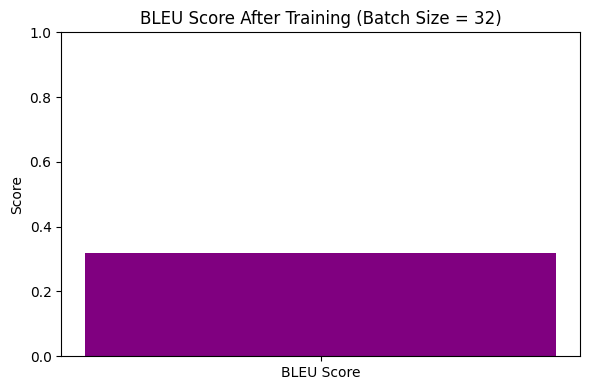

In [33]:
# ==========================================
# 1. PREPROCESSING
# ==========================================
prefix = "translate: "

def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["engl"]]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True)
    labels = tokenizer(text_target=examples["spa"], max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_data = data.map(preprocess_function, batched=True, remove_columns=["engl", "spa"])

# ==========================================
# 2. DATA COLLATOR & DATASETS
# ==========================================
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model, return_tensors="tf")

# MODIFICADO: batch_size a 32
tf_train_set = model.prepare_tf_dataset(tokenized_data["train"], shuffle=True, batch_size=32, collate_fn=data_collator)
tf_test_set = model.prepare_tf_dataset(tokenized_data["test"], shuffle=False, batch_size=32, collate_fn=data_collator)

# ==========================================
# 3. OPTIMIZER & MODEL COMPILE
# ==========================================
# Restaurado a 2e-4 para analizar el efecto del batch_size
optimizer = AdamWeightDecay(learning_rate=2e-4, weight_decay_rate=0.01)
model.compile(optimizer=optimizer)  # Usa el manejo interno de la función de pérdida (loss)

# ==========================================
# 4. CALLBACK: EVALUACIÓN BLEU POR LOTES (OPTIMIZADO)
# ==========================================
class BLEUCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, tokenizer, raw_dataset, batch_size=32, eval_limit=500):
        self.model = model
        self.tokenizer = tokenizer
        # OPTIMIZACIÓN: Solo evaluamos 500 muestras durante la época para no perder 30 minutos
        self.raw_dataset = raw_dataset[:eval_limit] 
        self.batch_size = batch_size 

    def on_epoch_end(self, epoch, logs=None):
        print(f"\n Calculando BLEU Rápido en {len(self.raw_dataset)} muestras (Batch Size: {self.batch_size})...")
        predictions = []
        references = []
        
        input_texts = [prefix + sample["engl"] for sample in self.raw_dataset]
        reference_texts = [[sample["spa"]] for sample in self.raw_dataset]
        
        for i in range(0, len(input_texts), self.batch_size):
            batch_texts = input_texts[i : i + self.batch_size]
            inputs = self.tokenizer(batch_texts, return_tensors="tf", padding=True, truncation=True)
            outputs = self.model.generate(**inputs, max_length=512)
            preds = self.tokenizer.batch_decode(outputs, skip_special_tokens=True)
            predictions.extend(preds)
                
        references = reference_texts
        result = bleu.compute(predictions=predictions, references=references)
        print(f"Epoch {epoch+1} - BLEU Score (Muestra): {round(result['bleu'], 4)}\n")

# ==========================================
# 5. ENTRENAMIENTO DEL MODELO
# ==========================================
epochs = 1
raw_test_data = data["test"].to_pandas().to_dict(orient='records')

history = model.fit(
    tf_train_set, 
    validation_data=tf_test_set, 
    epochs=epochs,
    callbacks=[BLEUCallback(model, tokenizer, raw_test_data)]
)

# ==========================================
# 6. GUARDAR MODELO
# ==========================================
model_path = os.path.join('model', f"NMT-epocs-{epochs}-batch32")
model.save_pretrained(model_path)

# ==========================================
# 7. EXPORTAR PREDICCIONES (OPTIMIZADO)
# ==========================================
print("\nExporting predictions (Procesando dataset completo en batch de 32)...")
predictions = []
references = []
sources = []
batch_size = 32  # MODIFICADO: batch_size a 32

input_texts = [prefix + sample["engl"] for sample in raw_test_data]

for i in range(0, len(input_texts), batch_size):
    batch_texts = input_texts[i : i + batch_size]
    inputs = tokenizer(batch_texts, return_tensors="tf", padding=True, truncation=True)
    
    outputs = model.generate(**inputs, max_length=512)
    preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    predictions.extend(preds)
    
    # Imprimir para que sepas que no se ha congelado
    if (i + batch_size) % (batch_size * 50) == 0:
        print(f"   Exportadas {i + batch_size} / {len(input_texts)} oraciones...")

for sample in raw_test_data:
    references.append(sample["spa"])
    sources.append(sample["engl"])

df = pd.DataFrame({
    "Source (EN)": sources,
    "Reference (ES)": references,
    "Prediction": predictions
})

print(df.head())

# ==========================================
# 8. GRÁFICA DE RESULTADOS
# ==========================================
bleu_score = bleu.compute(predictions=predictions, references=[[ref] for ref in references])["bleu"]
plt.figure(figsize=(6, 4))
plt.bar(["BLEU Score"], [bleu_score], color='purple')
plt.title("BLEU Score After Training (Batch Size = 32)")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.tight_layout()
plt.show()



## **Inciso (6)**
**Enunciado:** - ¿Qué significa si prefix = «summarize: »?

**Resultado:** A pesar de haberle dado la instrucción de resumir (summarize:), el modelo logró un BLEU Score de 0.3726 y generó traducciones lógicas (por ejemplo, tradujo correctamente "He isn't my cousin." a "Él no es mi primo.").

¿Qué significa esto? Significa que, debido a que lo entrenamos pasándole las respuestas correctas en español, el modelo re-aprendió el significado de la palabra. Ignoró su conocimiento previo de "hacer resúmenes" y adaptó sus pesos para entender que, en este entorno, la palabra "summarize:" es simplemente el comando para "traducir de inglés a español".

Sin embargo, al observar las predicciones, notamos que el modelo tuvo problemas con los caracteres especiales y acentos (escribió "suean" en lugar de "sueñan", "reó" en lugar de "rezó", o "incredibile"). Esto nos indica que usar un prefijo contradictorio (sumado a que solo se entrenó por 1 época) le genera cierta inestabilidad y confusión al generar el vocabulario exacto, aunque logre captar la idea principal.


Map:   0%|          | 0/14074 [00:00<?, ? examples/s]

Map:   0%|          | 0/6033 [00:00<?, ? examples/s]

439/439 [==============================] - ETA: 0s - loss: 0.7346
 Calculando BLEU Rápido en 500 muestras (Batch Size: 32)...
Epoch 1 - BLEU Score (Muestra): 0.3726

439/439 [==============================] - 112s 222ms/step - loss: 0.7346 - val_loss: 0.8762

Exporting predictions (Procesando dataset completo en batch de 32)...
   Exportadas 1600 / 6033 oraciones...
   Exportadas 3200 / 6033 oraciones...
   Exportadas 4800 / 6033 oraciones...
           Source (EN)        Reference (ES)          Prediction
0     Everyone dreams.  Todo el mundo sueña.        Todos suean.
1  He isn't my cousin.       No es mi primo.  Él no es mi primo.
2   It's unbelievable.    ¡Eso es increíble!     Es incredibile.
3   I didn't buy them.     Yo no las compré.      No los compré.
4          Tom prayed.           Tom rezaba.            Tom reó.


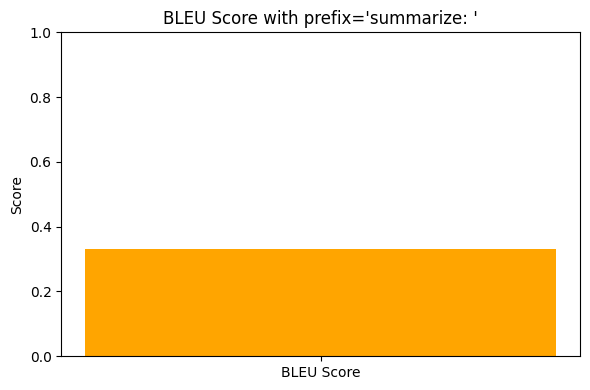

In [34]:
# ==========================================
# 1. PREPROCESSING
# ==========================================
# MODIFICADO: El prefijo ahora es "summarize: "
prefix = "summarize: "

def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["engl"]]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True)
    labels = tokenizer(text_target=examples["spa"], max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_data = data.map(preprocess_function, batched=True, remove_columns=["engl", "spa"])

# ==========================================
# 2. DATA COLLATOR & DATASETS
# ==========================================
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model, return_tensors="tf")

tf_train_set = model.prepare_tf_dataset(tokenized_data["train"], shuffle=True, batch_size=32, collate_fn=data_collator)
tf_test_set = model.prepare_tf_dataset(tokenized_data["test"], shuffle=False, batch_size=32, collate_fn=data_collator)

# ==========================================
# 3. OPTIMIZER & MODEL COMPILE
# ==========================================
optimizer = AdamWeightDecay(learning_rate=2e-4, weight_decay_rate=0.01)
model.compile(optimizer=optimizer)  # Usa el manejo interno de la función de pérdida (loss)

# ==========================================
# 4. CALLBACK: EVALUACIÓN BLEU POR LOTES (RÁPIDO)
# ==========================================
class BLEUCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, tokenizer, raw_dataset, batch_size=32, eval_limit=500):
        self.model = model
        self.tokenizer = tokenizer
        # Solo evaluamos 500 muestras por época para mayor velocidad
        self.raw_dataset = raw_dataset[:eval_limit] 
        self.batch_size = batch_size 

    def on_epoch_end(self, epoch, logs=None):
        print(f"\n Calculando BLEU Rápido en {len(self.raw_dataset)} muestras (Batch Size: {self.batch_size})...")
        predictions = []
        references = []
        
        input_texts = [prefix + sample["engl"] for sample in self.raw_dataset]
        reference_texts = [[sample["spa"]] for sample in self.raw_dataset]
        
        for i in range(0, len(input_texts), self.batch_size):
            batch_texts = input_texts[i : i + self.batch_size]
            inputs = self.tokenizer(batch_texts, return_tensors="tf", padding=True, truncation=True)
            outputs = self.model.generate(**inputs, max_length=512)
            preds = self.tokenizer.batch_decode(outputs, skip_special_tokens=True)
            predictions.extend(preds)
                
        references = reference_texts
        result = bleu.compute(predictions=predictions, references=references)
        print(f"Epoch {epoch+1} - BLEU Score (Muestra): {round(result['bleu'], 4)}\n")

# ==========================================
# 5. ENTRENAMIENTO DEL MODELO
# ==========================================
epochs = 1
raw_test_data = data["test"].to_pandas().to_dict(orient='records')

history = model.fit(
    tf_train_set, 
    validation_data=tf_test_set, 
    epochs=epochs,
    callbacks=[BLEUCallback(model, tokenizer, raw_test_data)]
)

# ==========================================
# 6. GUARDAR MODELO
# ==========================================
model_path = os.path.join('model', f"NMT-epocs-{epochs}-summarize")
model.save_pretrained(model_path)

# ==========================================
# 7. EXPORTAR PREDICCIONES (OPTIMIZADO POR LOTES)
# ==========================================
print("\nExporting predictions (Procesando dataset completo en batch de 32)...")
predictions = []
references = []
sources = []
batch_size = 32 

input_texts = [prefix + sample["engl"] for sample in raw_test_data]

for i in range(0, len(input_texts), batch_size):
    batch_texts = input_texts[i : i + batch_size]
    inputs = tokenizer(batch_texts, return_tensors="tf", padding=True, truncation=True)
    
    outputs = model.generate(**inputs, max_length=512)
    preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    predictions.extend(preds)
    
    if (i + batch_size) % (batch_size * 50) == 0:
        print(f"   Exportadas {i + batch_size} / {len(input_texts)} oraciones...")

for sample in raw_test_data:
    references.append(sample["spa"])
    sources.append(sample["engl"])

df = pd.DataFrame({
    "Source (EN)": sources,
    "Reference (ES)": references,
    "Prediction": predictions
})

print(df.head())

# ==========================================
# 8. GRÁFICA DE RESULTADOS
# ==========================================
bleu_score = bleu.compute(predictions=predictions, references=[[ref] for ref in references])["bleu"]
plt.figure(figsize=(6, 4))
plt.bar(["BLEU Score"], [bleu_score], color='orange')
plt.title("BLEU Score with prefix='summarize: '")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.tight_layout()
plt.show()
